In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from random import randint
from sklearn.utils import shuffle
import cv2
from scipy import ndimage
np.random.seed(777)

In [2]:
kernel1 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

In [3]:
data = pd.read_csv("train.csv")

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


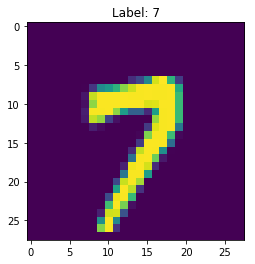

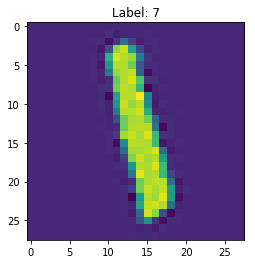

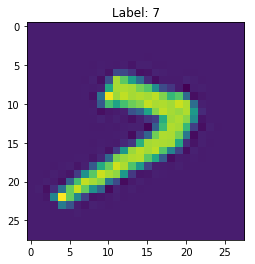

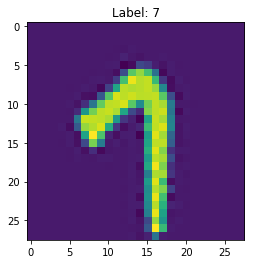

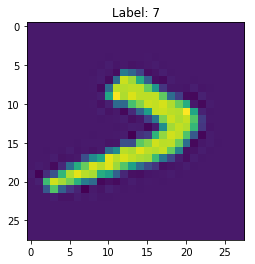

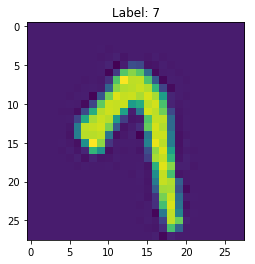

In [171]:
index = randint(0,len(data))
row = np.array(data.iloc[index].tolist()[1:])
label = data.iloc[index].tolist()[0]

row = row.reshape(28,28)
imgplot = plt.imshow(row)
plt.title("Label: "+str(label))
plt.show()

row_sharp_conv = ndimage.convolve(row,kernel1,mode='nearest')
imgplot = plt.imshow(row_sharp)
plt.title("Label: "+str(label))
plt.show()

row_sharp = ndimage.rotate(row,-30,reshape=False)
imgplot = plt.imshow(row_sharp)
plt.title("Label: "+str(label))
plt.show()

row_sharp = ndimage.rotate(row,30,reshape=False)
imgplot = plt.imshow(row_sharp)
plt.title("Label: "+str(label))
plt.show()

row_sharp = ndimage.rotate(row,-40,reshape=False)
imgplot = plt.imshow(row_sharp)
plt.title("Label: "+str(label))
plt.show()

row_sharp = ndimage.rotate(row,40,reshape=False)
imgplot = plt.imshow(row_sharp)
plt.title("Label: "+str(label))
plt.show()

In [172]:
row_sharp_conv.shape

(28, 28)

In [194]:
from tqdm import tqdm

training_data = []

for idx in tqdm(range(0,len(data))):
    row = data.iloc[idx]
    label = np.array([0]*10)
    row = row.tolist()
    label[row[0]] = 1
    row = np.array(row[1:])
    training_data.append((row.reshape(28,28),label))
    row_sharp = ndimage.convolve(row.reshape(28,28),kernel1,mode='nearest')
    training_data.append((row_sharp.reshape(28,28),label))
    row_rot1 = ndimage.rotate(row.reshape(28,28),30,reshape=False)
    training_data.append((row_rot1.reshape(28,28),label))
    row_rot2 = ndimage.rotate(row.reshape(28,28),-30,reshape=False)
    training_data.append((row_rot2.reshape(28,28),label))

100%|██████████| 42000/42000 [00:24<00:00, 1690.09it/s]


In [9]:
from keras.layers import Conv2D,Dense,Activation,Dropout,Dense,Flatten,MaxPooling2D
from keras.models import Sequential

Using TensorFlow backend.


In [97]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

checkpointer = ModelCheckpoint('checkpoint', monitor='val_acc', verbose=1,
                               save_best_only=True, save_weights_only=False,
                               mode='auto', period=1)
earlystopper = EarlyStopping(monitor='val_acc', patience=1, verbose=1,restore_best_weights=True)

In [204]:
model = Sequential()
model.add(Conv2D(25,(7,7),activation='relu',padding='valid',input_shape=(1,28,28),data_format='channels_first'))
model.add(MaxPooling2D((3,3),padding='valid'))
model.add(Conv2D(15,(5,5),activation='relu',padding='valid'))
model.add(MaxPooling2D((3,3),padding='valid'))
model.add(Flatten())
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(125,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(25,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='sigmoid'))

In [205]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 25, 22, 22)        1250      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 8, 7, 22)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 4, 3, 15)          8265      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 1, 1, 15)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 15)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 250)               4000      
_________________________________________________________________
dropout_22 (Dropout)         (None, 250)               0         
__________

In [206]:
model.compile(optimizer='Adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [207]:
training_data = shuffle(training_data)
X = np.array([[_[0]] for _ in training_data])
y = np.array([_[1] for _ in training_data])

In [208]:
X.shape

(168000, 1, 28, 28)

In [209]:
call_back = model.fit(X,y,epochs=13,batch_size=512,validation_split=0.1,callbacks=[checkpointer,earlystopper])

Train on 151200 samples, validate on 16800 samples
Epoch 1/13
151200/151200 [==============================] - 96s 635us/step - loss: 2.0672 - acc: 0.2164 - val_loss: 1.4694 - val_acc: 0.3776

Epoch 00001: val_acc did not improve from 0.97571
Epoch 2/13
151200/151200 [==============================] - 90s 598us/step - loss: 1.2255 - acc: 0.5237 - val_loss: 0.7055 - val_acc: 0.7827

Epoch 00002: val_acc did not improve from 0.97571
Epoch 3/13
151200/151200 [==============================] - 88s 583us/step - loss: 0.6984 - acc: 0.7997 - val_loss: 0.4916 - val_acc: 0.8554

Epoch 00003: val_acc did not improve from 0.97571
Epoch 4/13
151200/151200 [==============================] - 88s 583us/step - loss: 0.5006 - acc: 0.8614 - val_loss: 0.3693 - val_acc: 0.8936

Epoch 00004: val_acc did not improve from 0.97571
Epoch 5/13
151200/151200 [==============================] - 88s 584us/step - loss: 0.4088 - acc: 0.8886 - val_loss: 0.2966 - val_acc: 0.9143

Epoch 00005: val_acc did not improve fr

In [210]:
call_back

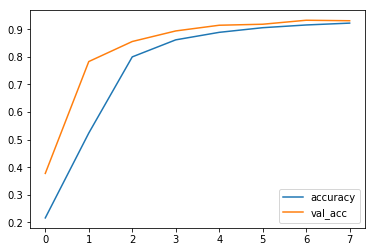

In [212]:
ep = len(call_back.history['acc'])
plt.plot([_ for _ in range(ep)],[_ for _ in call_back.history['acc']],label='accuracy')
plt.plot([_ for _ in range(ep)],[_ for _ in call_back.history['val_acc']],label='val_acc')
plt.legend()
plt.show()

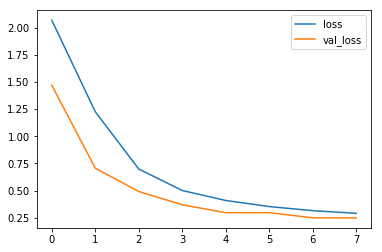

In [213]:
plt.plot([_ for _ in range(ep)],[_ for _ in call_back.history['loss']],label='loss')
plt.plot([_ for _ in range(ep)],[_ for _ in call_back.history['val_loss']],label='val_loss')
plt.legend()
plt.show()

In [76]:
test_data = pd.read_csv("test.csv")

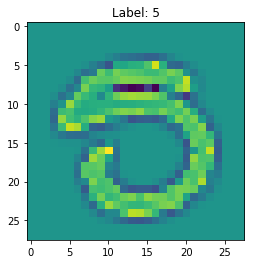

In [217]:
index = randint(0,len(test_data))
row = np.array(test_data.iloc[24818-1].tolist())

row = ndimage.convolve(row.reshape(28,28),kernel1,mode='nearest')
label = model.predict(np.array([[row]]))
#print(label)
imgplot = plt.imshow(row)
plt.title("Label: "+str(np.argmax(label)))
plt.show()

In [233]:
df = []
for idx in tqdm(range(0,len(test_data))):
    row = np.array(test_data.iloc[idx].tolist())
    row = row.reshape(28,28)
    label1 = model.predict(np.array([[row]]))
    row = ndimage.convolve(row.reshape(28,28),kernel1,mode='nearest')
    label2 = model.predict(np.array([[row]]))
    label = np.divide(np.add(label1,label2),2)
    df.append([idx+1,np.argmax(label)])

100%|██████████| 28000/28000 [01:10<00:00, 397.47it/s]


In [234]:
df = pd.DataFrame(df,columns=['ImageId','Label'])

In [235]:
df.tail()

,ImageId,Label
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
27999,28000,2


In [236]:
#df.to_csv("new_submission_final.csv",index=False)

In [237]:
prev_data = pd.read_csv("new_submission_2.csv")

In [238]:
df['prev_Label'] = prev_data['Label']

In [239]:
df = df[df['Label']!=df['prev_Label']]

In [240]:
len(df)

1541

ImageId       26089
Label             5
prev_Label        8
Name: 26088, dtype: int64


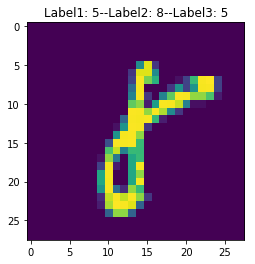

In [248]:
r = df.iloc[randint(0,len(df))]
print(r)
row = np.array(test_data.iloc[r.ImageId-1].tolist())

row = row.reshape(28,28)
row_conv = ndimage.convolve(row,kernel1,mode='nearest')
label = model.predict(np.array([[row_conv]]))
label2 = model.predict(np.array([[row]]))
#print(label)
final_label = np.divide(np.add(label,label2),2)
imgplot = plt.imshow(row)
plt.title("Label1: "+str(np.argmax(label))+"--Label2: "+str(np.argmax(label2))+"--Label3: "+str(np.argmax(final_label)))
plt.show()

In [155]:
r.ImageId

15049